In [1]:
# Lab Cleaning Numerical Data

In [2]:
#1 Import the necessary libraries.
#2 Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as plt2

customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
#3. First look at its main features (head, shape, info).

customer_df.shape # 9134 rows, 24 columns
customer_df.info # not really useful
customer_df.head(25)

pd.set_option('display.max_columns', None)

In [4]:
#4 Rename the columns so they follow the PE8 (snake case).

customer_df.columns = list(map(lambda x: x.lower(), customer_df.columns)) # Lowercase first
customer_df.columns = list(map(lambda x: x.replace(' ','_'), customer_df.columns)) # Underscores next

In [5]:
#5 Change effective to date column to datetime format.

customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df.dtypes # it worked!

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [6]:
#6 Check NaN values per column.

customer_df.isna().sum() # No NaNs, magic

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [7]:
#7 Define a function that differentiates between continuous and discrete variables. 
# Hint: A number of unique values might be useful. 
# Store continuous data into a continuous variable and do the same for discrete and categorical.

# First, num/categorical split

categorical = customer_df.select_dtypes(include='object')
numerical = customer_df.select_dtypes(include=['number', 'datetime'])

#Now the continuous vs. discrete split

def cd_split():
    distribution = {}
    
    for column in numerical.columns:
        distribution[column] = len(customer_df[column].value_counts())
    
    return display(distribution)

cd_split() # it seems that number_of_open_complaints and number_of_policies could be discrete, rest is continuous

numerical_discrete = numerical[['number_of_open_complaints','number_of_policies']]
numerical_cont = numerical.drop(['number_of_open_complaints','number_of_policies'], axis = 1)

{'customer_lifetime_value': 8041,
 'effective_to_date': 59,
 'income': 5694,
 'monthly_premium_auto': 202,
 'months_since_last_claim': 36,
 'months_since_policy_inception': 100,
 'number_of_open_complaints': 6,
 'number_of_policies': 9,
 'total_claim_amount': 5106}

In [8]:
#8 For the categorical data, check if there is some kind of text in a variable so we would need to clean it. 
# Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

def cat_split():
    distribution = {}
    
    for column in categorical.columns:
        distribution[column] = len(customer_df[column].value_counts())
        print(customer_df[column].value_counts())
    
    return display(distribution)

cat_split()

# Checked all labels to spot any weird data, found nothing. This is a subsitute to countplot below.

VS42598    1
NJ54277    1
UI36374    1
BP23267    1
PI98333    1
          ..
VZ64716    1
NF90665    1
VN59368    1
IN67175    1
QY41855    1
Name: customer, Length: 9134, dtype: int64
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
No     7826
Yes    1308
Name: response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64
F    4658
M    4476
Name: gender, dtype: int64
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64
Personal Auto     67

{'customer': 9134,
 'state': 5,
 'response': 2,
 'coverage': 3,
 'education': 5,
 'employmentstatus': 5,
 'gender': 2,
 'location_code': 3,
 'marital_status': 3,
 'policy_type': 3,
 'policy': 9,
 'renew_offer_type': 4,
 'sales_channel': 4,
 'vehicle_class': 6,
 'vehicle_size': 3}

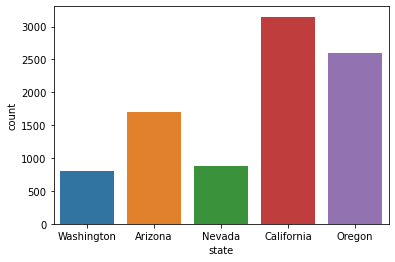

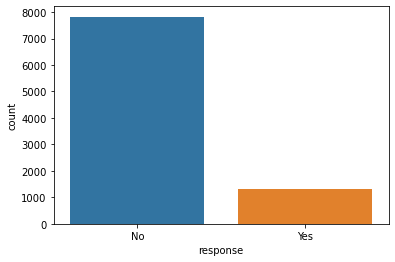

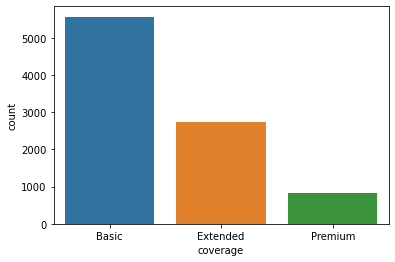

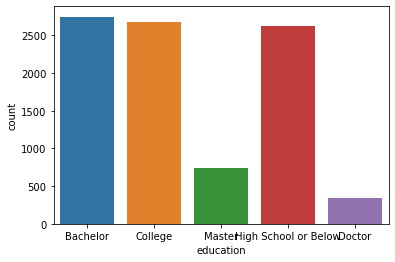

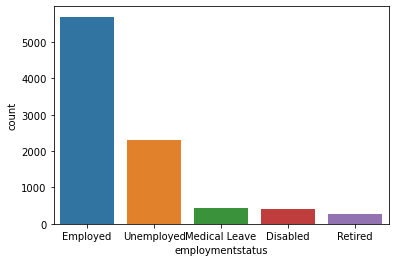

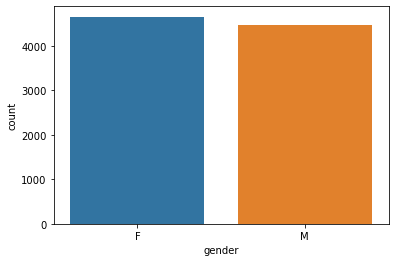

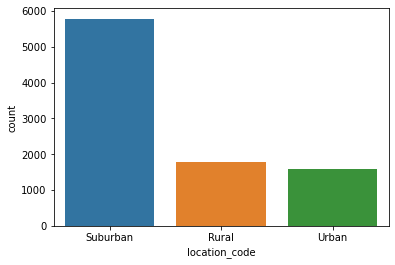

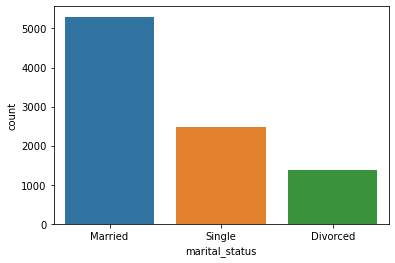

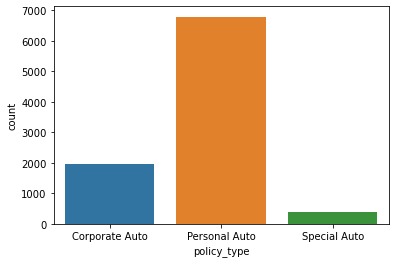

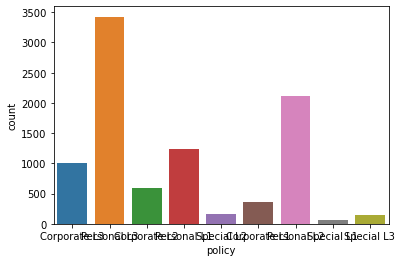

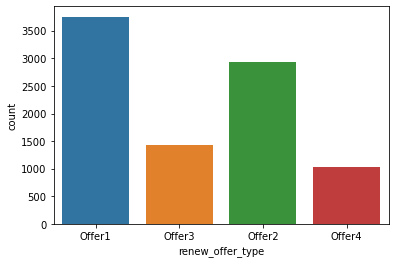

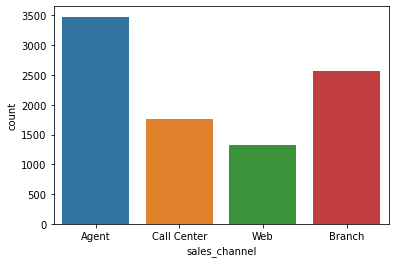

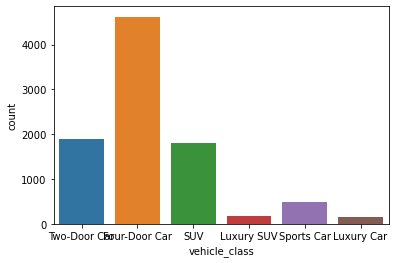

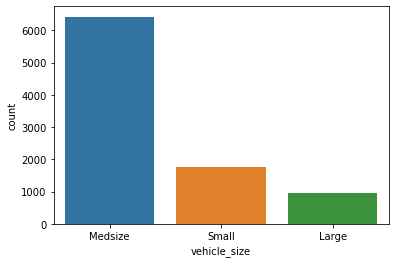

In [9]:
#8 continued

for column in categorical.columns[1:]:
    sns.countplot(x=categorical[column])
    plt.show()

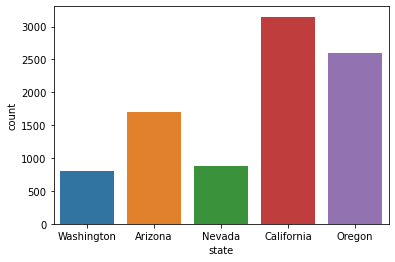

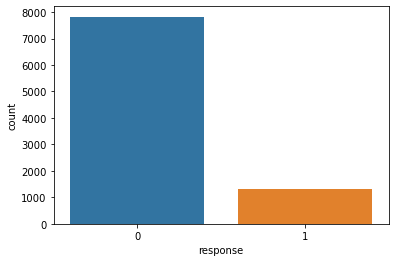

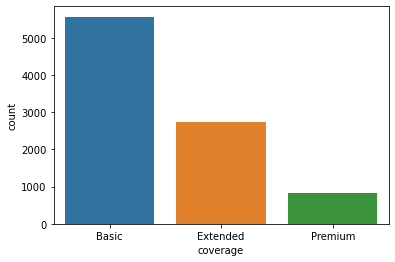

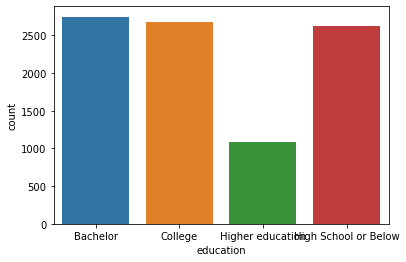

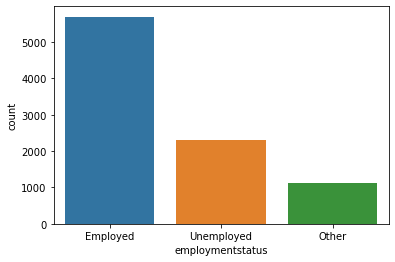

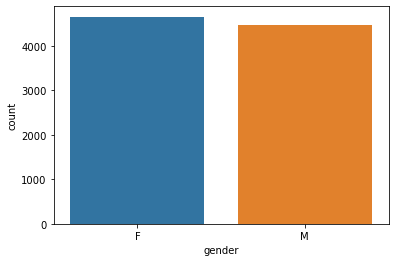

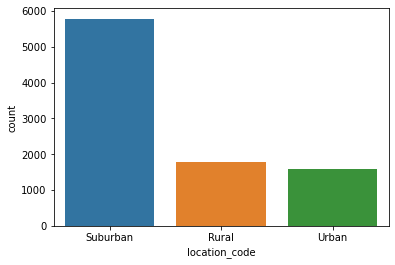

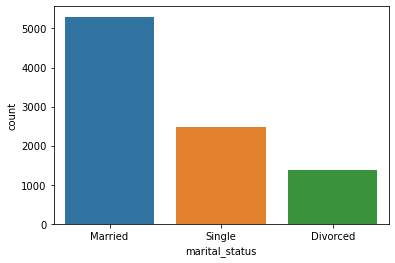

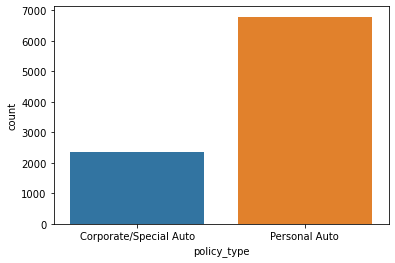

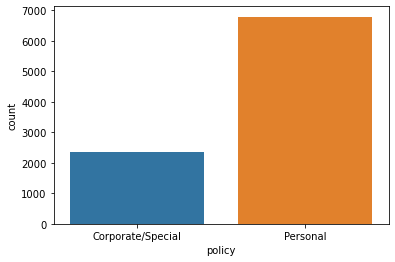

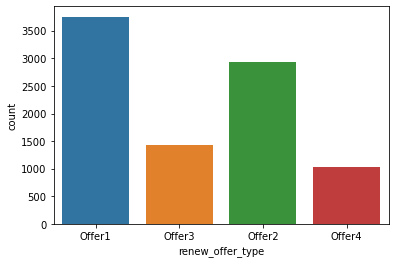

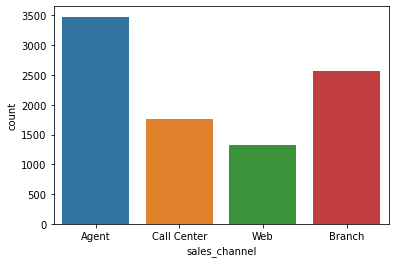

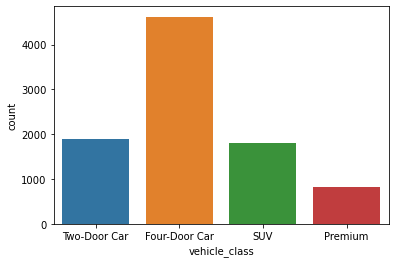

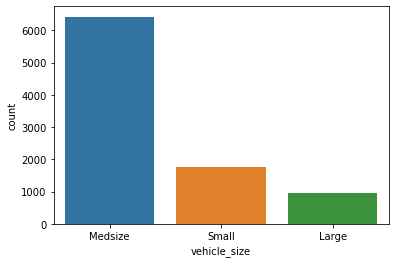

In [10]:
#8 contd

# state - fine as it is
# response - need to encode them to 1 and 0
# coverage - good as it is
# education - combine doctor & master together
# employmentstatus - combine medical leave, retired and diasbled into Other
# gender - good as it is
# location_code - good as it is
# marital_status - good as it is
# policy_type - combine special with corporate
# policy - combine policies with different type (personal, corporate, special), regardless of level and then corp with special for consistency
# renew_offer_type - good as it is
# sales_channel - good as it is
# vehicle_class - combine luxury SUV, sports car and luxury car together, called Premium
# vehicle_size - good as it is

def clean_categorical(x):
    if x in ['No']:
        return 0
    elif x in ['Yes']:
        return 1
    elif x in ['Master', 'Doctor']:
        return 'Higher education'
    elif x in ['Medical Leave', 'Retired', 'Disabled']:
        return 'Other'
    elif x in ['Special Auto','Corporate Auto']:
        return 'Corporate/Special Auto'
    elif x in ['Corporate L1', 'Corporate L2', 'Corporate L3']:
        return 'Corporate/Special'
    elif x in ['Personal L1', 'Personal L2', 'Personal L3']:
        return 'Personal'
    elif x in ['Special L1', 'Special L2', 'Special L3']:
        return 'Corporate/Special'
    elif x in ['Luxury Car', 'Sports Car', 'Luxury SUV']:
        return 'Premium'
    else:
        return x
    
categorical['response'] = list(map(clean_categorical, categorical['response']))
categorical['education'] = list(map(clean_categorical, categorical['education']))
categorical['employmentstatus'] = list(map(clean_categorical, categorical['employmentstatus']))
categorical['policy_type'] = list(map(clean_categorical, categorical['policy_type']))
categorical['policy'] = list(map(clean_categorical, categorical['policy']))
categorical['policy_type'] = list(map(clean_categorical, categorical['policy_type']))
categorical['vehicle_class'] = list(map(clean_categorical, categorical['vehicle_class']))

for column in categorical.columns[1:]:
    sns.countplot(x=categorical[column])
    plt.show()

In [11]:
## Lab 2 starts here

In [12]:
#2 Load the continuous and discrete variables into continuous_df and discrete_df variables.

continuous_df = numerical_cont
discrete_df = numerical_discrete

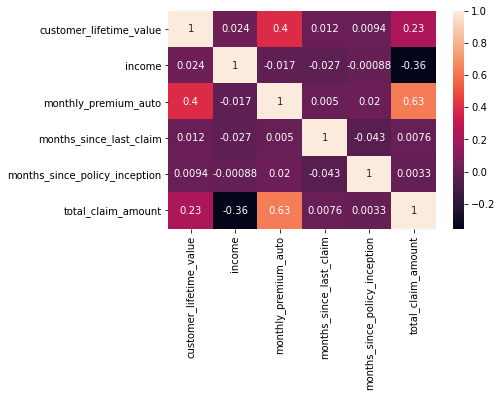

In [13]:
#3 Plot a correlation matrix, what can you see?

correlation_matrix = continuous_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# Total claim amount is reasonably correlated with the monthly premium auto (0.63)., Monthly premioum auto is also showing some correlation
# with the customer lifetime value (0.4), and there is also a similar negative correlation (-0.36) between income and total claim amount.
# No correlation of these would indicate any feature to be dropped from modelling.

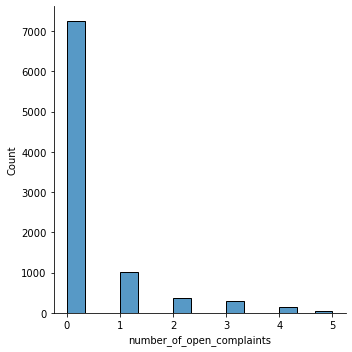

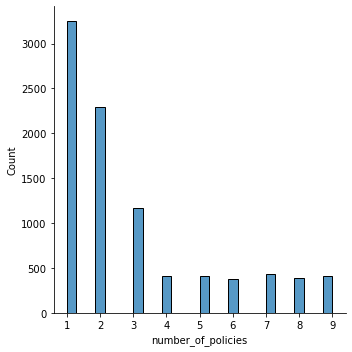

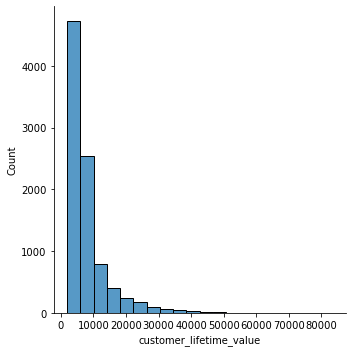

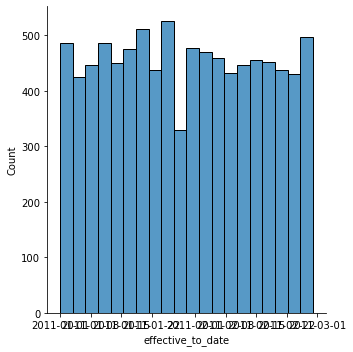

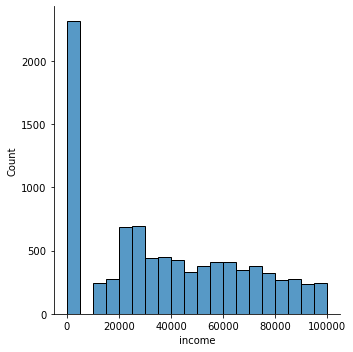

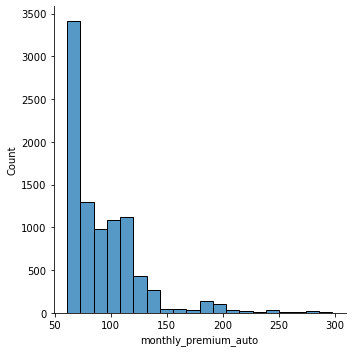

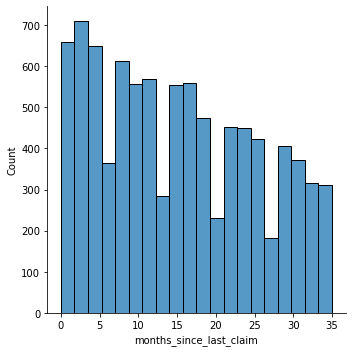

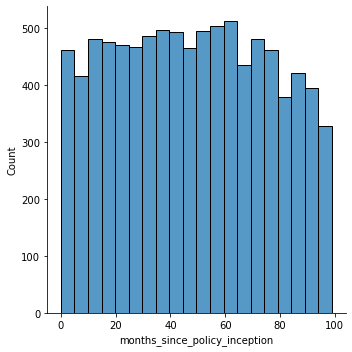

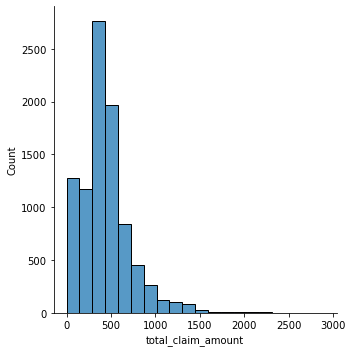

In [14]:
#4 Create a function to plot every discrete variables. 
# Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

def disc_plot():
    for column in discrete_df.columns:
        sns.displot(discrete_df[column])
        plt.show()
disc_plot()

def cont_plot():
    for column in continuous_df.columns:
        sns.displot(continuous_df[column], bins = 20)
        plt.show()
cont_plot()

In [15]:
#5 What can you see in the plots?

# number_of_open_complaints - vast majority with 0, then 1 and more (but a small portion of data)
# number_of_open_policies - most data between 1, 2 and 3, pretty stable at higher values afterward
# customer_lifetime_value - a huge portion below 10k, with some outliers ranging up to 80k
# effective_to_date - no patterns, just a date column. Could analyze if any day/month is more frequent
# income - a huge amount of data in the first bucket of 0-5k, relatively normally-distributed afterwards, no outliers
# monthly_premium_auto - 60-100 has the most of it, but there are outliers starting at around 200 and up
# months_since_last_claim - some strange drops in 6-month intervals (6, 12, 18 mths etc) but overall a diminishing pattern and no outliers
# months_since_policy_inception - no real pattern and outliers
# total_claim_amount - most data encapsulated in 0-1000 range, with outliers starting at 1500

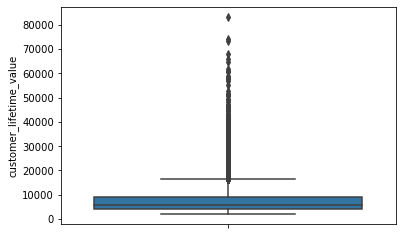

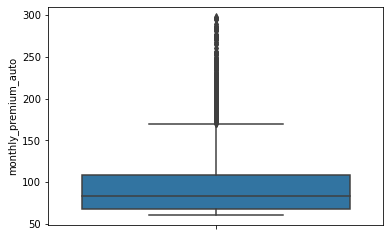

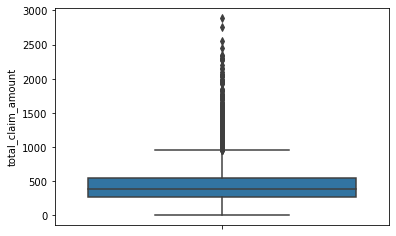

In [16]:
#6 Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.

sns.boxplot(y=continuous_df['customer_lifetime_value'])
plt.show()
sns.boxplot(y=continuous_df['monthly_premium_auto'])
plt.show()
sns.boxplot(y=continuous_df['total_claim_amount'])
plt.show()

367 elements to be removed from customer_lifetime_value, 4.0 %
261 elements to be removed from monthly_premium_auto, 2.9 %
303 elements to be removed from total_claim_amount, 3.3 %


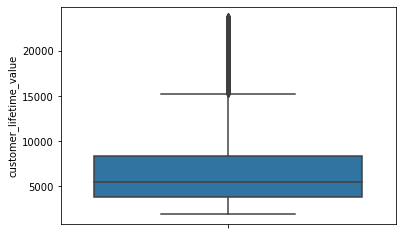

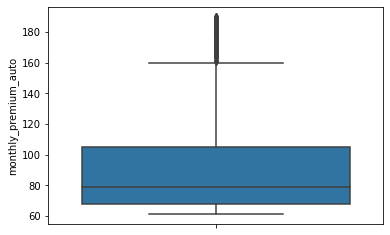

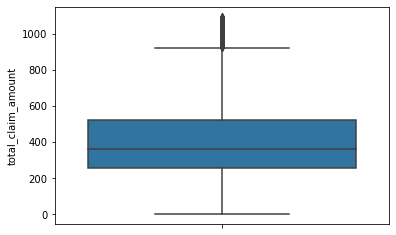

In [17]:
#7 Have you found outliers? If you have, what should we do with them?

# We could limit the high-ramge outliers by cutting them to 1.5 or 2-3 iqr

iqr_customer_lifetime_value = np.percentile(continuous_df['customer_lifetime_value'],75) - np.percentile(continuous_df['customer_lifetime_value'],25)
upper_limit_customer_lifetime_value = np.percentile(continuous_df['customer_lifetime_value'],75) + 3*iqr_customer_lifetime_value
extra1 = continuous_df[continuous_df['customer_lifetime_value'] > upper_limit_customer_lifetime_value] # 2*iqr was removing a bit too much - 7%)

iqr_monthly_premium_auto = np.percentile(continuous_df['monthly_premium_auto'],75) - np.percentile(continuous_df['monthly_premium_auto'],25)
upper_limit_monthly_premium_auto = np.percentile(continuous_df['monthly_premium_auto'],75) + 2*iqr_monthly_premium_auto
extra2 = continuous_df[continuous_df['monthly_premium_auto'] > upper_limit_monthly_premium_auto]

iqr_total_claim_amount = np.percentile(continuous_df['total_claim_amount'],75) - np.percentile(continuous_df['total_claim_amount'],25)
upper_limit_total_claim_amount= np.percentile(continuous_df['total_claim_amount'],75) + 2*iqr_total_claim_amount
extra3 = continuous_df[continuous_df['total_claim_amount'] > upper_limit_total_claim_amount]

print(len(extra1),'elements to be removed from customer_lifetime_value,', round(100*len(extra1)/len(continuous_df),1),'%')
print(len(extra2),'elements to be removed from monthly_premium_auto,', round(100*len(extra2)/len(continuous_df),1),'%')
print(len(extra3),'elements to be removed from total_claim_amount,', round(100*len(extra3)/len(continuous_df),1),'%')

# removing these after checking it is safe

continuous_df = continuous_df[continuous_df['customer_lifetime_value'] < upper_limit_customer_lifetime_value]
continuous_df = continuous_df[continuous_df['monthly_premium_auto'] < upper_limit_monthly_premium_auto]
continuous_df = continuous_df[continuous_df['total_claim_amount'] < upper_limit_total_claim_amount]

sns.boxplot(y=continuous_df['customer_lifetime_value'])
plt.show()
sns.boxplot(y=continuous_df['monthly_premium_auto'])
plt.show()
sns.boxplot(y=continuous_df['total_claim_amount'])
plt.show()

# Much better :)

In [18]:
#8 Check nan values per column - already checked in lab1, but let's give it a go again

categorical.isna().sum() # No NaN
continuous_df.isna().sum() # No NaN
discrete_df.isna().sum() # No NaN


number_of_open_complaints    0
number_of_policies           0
dtype: int64

In [19]:
# --- Lab 3 starts here

In [20]:
## First, I need to deal with unmatching numbers of rows (indexes) due to dropped rows from a subest of data only
display(categorical.shape)
display(continuous_df.shape)
display(discrete_df.shape)

(9134, 15)

(8390, 7)

(9134, 2)

In [21]:
# This can be done (I am nto saying this is the best way) by concatting the rows together and 
# removing the NaNs, as the (wrangled) data didn't have any NaNs

temp = pd.concat([categorical, discrete_df, continuous_df], axis = 1)
temp.dropna(inplace=True)

# and then split the features once again, based on their type

categorical = temp.select_dtypes(include='object')
discrete_df = temp[['number_of_open_complaints','number_of_policies']]
continuous_df = temp.select_dtypes(include=['number', 'datetime']).drop(['number_of_open_complaints','number_of_policies'], axis = 1)

display(categorical.shape)
display(continuous_df.shape)
display(discrete_df.shape)

(8390, 14)

(8390, 8)

(8390, 2)

In [22]:
#1 Open the categoricals variable we created before.

categorical

,customer,state,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,Basic,Bachelor,Employed,F,Suburban,Married,Corporate/Special Auto,Corporate/Special,Offer1,Agent,Two-Door Car,Medsize
2,AI49188,Nevada,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate/Special Auto,Corporate/Special,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal,Offer1,Agent,Four-Door Car,Medsize
5,OC83172,Oregon,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,Personal,Offer2,Web,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Extended,College,Employed,F,Suburban,Divorced,Corporate/Special Auto,Corporate/Special,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate/Special Auto,Corporate/Special,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal,Offer3,Branch,Four-Door Car,Large


In [23]:
#2 Plot all the categorical variables with the proper plot. What can you see?

# They were plotted (& re-plotted) in the previous lab(s). Review summary in the comment section above as well.

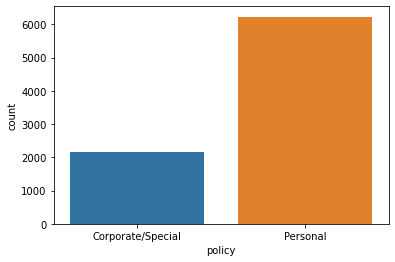

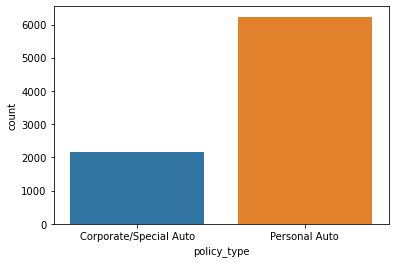

In [24]:
#3 There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

# The only one I can easily identify is the policy vs policy_type, both with almost identical data & distribution:

sns.countplot(x=categorical['policy'])
plt.show()
if 'policy_type' in categorical.columns:
    sns.countplot(x=categorical['policy_type'])
    plt.show()

# We could eliminate one of the columns entirely, e.g. policy_type

if 'policy_type' in categorical.columns:
    categorical = categorical.drop(['policy_type'], axis = 1)

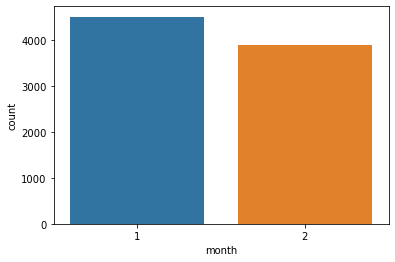

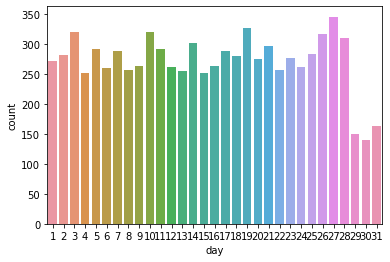

In [27]:
#4 Plot time variable. Can you extract something from it?

if 'effective_to_date' in continuous_df.columns: 
    sns.countplot(x=continuous_df['effective_to_date']) # Whoaaaaaa
    plt.show()
    
    discrete_df['month'] = continuous_df['effective_to_date'].dt.month
    discrete_df['day'] = continuous_df['effective_to_date'].dt.day
    continuous_df = continuous_df.drop(['effective_to_date'], axis = 1)

# and re-plot using the month/day only

sns.countplot(x=discrete_df['month']) # Slightly more of January data
plt.show()
sns.countplot(x=discrete_df['day']) # a decline in the last 3 days of the months
plt.show()